In [1]:
#from https://milliams.com/courses/numpy_simulation/
import numpy as np

def initialise_state(num_steps, array_row, array_col, initial_state):
    cells = np.zeros((num_steps, array_size, array_col), dtype="uint8")  # this dtype holds integers from 0-255
    cells[0] = initial_state
    return cells

def update_state(previous_array):
    new_array = np.zeros_like(previous_array)
    row = previous_array.shape[0]
    col = len(previous_array[0])
    dirs=[[-1,-1],[1,-1],[-1,1],[1,1]]
    for i in range(row):
        for j in range(col):
            cnt=0
            for ddir in dirs:
                x=i+ddir[0]
                y=j+ddir[1]
                if x>=0 and y>=0 and x<row and y<col:
                    if previous_array[x][y]==1:
                        cnt+=1
            if cnt%2==1:
                new_array[i][j]=1
            else:
                new_array[i][j]=0
    return new_array

def run_simulation(num_steps, array_row, array_col, initial_state):
    state = initialise_state(num_steps, array_row, array_col, initial_state)

    for t in range(1, num_steps):
        state[t] = update_state(state[t-1])

    return state

number_of_steps = 5
initial_state = [[0, 1, 0, 1],[0, 0, 0, 1],[0, 1, 1, 1],[1, 0, 0, 1]]
array_size = len(initial_state)

cells = run_simulation(number_of_steps, len(initial_state), len(initial_state[0]), initial_state)

print(cells)

np.savez_compressed("infection_simulation", state=cells)

[[[0 1 0 1]
  [0 0 0 1]
  [0 1 1 1]
  [1 0 0 1]]

 [[0 0 1 0]
  [0 1 0 1]
  [0 1 0 0]
  [1 1 0 1]]

 [[1 0 0 0]
  [1 1 1 1]
  [0 1 0 0]
  [1 0 1 0]]

 [[1 0 0 1]
  [1 1 1 0]
  [1 0 0 0]
  [1 0 1 0]]

 [[1 0 1 1]
  [0 0 1 0]
  [1 0 1 0]
  [0 1 0 0]]]


In [2]:
import numpy as np

with np.load("infection_simulation.npz") as f:
    cells = f["state"]

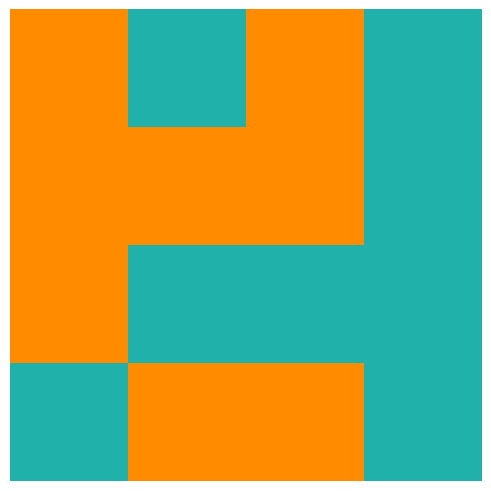

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set up the initial figure and axes
fig, ax = plt.subplots(constrained_layout=True)
ax.axis("off")

cmap = ListedColormap(["darkorange", "lightseagreen"])

# Plot the initial grid
array_plot = ax.imshow(
    cells[0],  # Make our data 2-D
    vmin=cells.min(),
    vmax=cells.max(),
    animated=True,
    cmap=cmap
)

In [4]:
def animate(i):
    array_plot.set_array(cells[i])
    return [array_plot]

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create an animation object which:
# - animate the Figure, `fig`
# - using the function `animate`
# - for len(cells) number of frames
# - where each frame lasts 100 milliseconds
anim = FuncAnimation(fig, animate, frames=len(cells), interval=100)

# Display the animation in the notebook
HTML(anim.to_jshtml())